# Introduction to ConvNets

## Instantiating a small ConvNet
We will instantiate a small ConvNet to tackle MNIST classification.

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


## Adding a classifier on top.

In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

## Training the ConvNet on MNIST Images

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.1703 - acc: 0.9468
Epoch 2/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0478 - acc: 0.9851
Epoch 3/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0327 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0246 - acc: 0.9926
Epoch 5/5
10000/10000 [==============================] - 1s 66us/step
0.9927


# Training a ConvNet from scratch on a small Dataset

## Create the smaller Dataset

In [4]:
import os, shutil
from keras.utils import get_file

original_dataset_dir = get_file('dogs_vs_cats',
                                origin='https://www.dropbox.com/s/9s3qr24gr1rwi2u/dogs_vs_cats.tar.gz?dl=1',
                                file_hash='2b4adc5ba7b7ccda13d96b0356a83077af23ef3b090df5dc7d37c870f188c7b9',
                                untar=True)

original_dataset_dir = os.path.join(original_dataset_dir, 'train')

base_dir = os.path.join(os.path.expanduser('~'), 'datasets/cats_and_dogs_small')

try:
    os.makedirs(base_dir)
except:
    shutil.rmtree(base_dir)
    os.makedirs(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Sanity test.
print("Total training cat images:", len(os.listdir(train_cats_dir)))
print("Total training dog images:", len(os.listdir(train_dogs_dir)))
print("Total validation cat images:", len(os.listdir(validation_cats_dir)))
print("Total validation dog images:", len(os.listdir(validation_dogs_dir)))
print("Total test cat images:", len(os.listdir(test_cats_dir)))
print("Total test dog images:", len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


## Building the network

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data Preprocessing

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 7s 73ms/step - loss: 0.6841 - acc: 0.5560 - val_loss: 0.6666 - val_acc: 0.5930
Epoch 2/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6544 - acc: 0.6110 - val_loss: 0.6429 - val_acc: 0.6290
Epoch 3/30
100/100 [==============================] - 7s 66ms/step - loss: 0.6219 - acc: 0.6520 - val_loss: 0.6492 - val_acc: 0.6090
Epoch 4/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5816 - acc: 0.6985 - val_loss: 0.6014 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5444 - acc: 0.7300 - val_loss: 0.5787 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5106 - acc: 0.7415 - val_loss: 0.5918 - val_acc: 0.6780
Epoch 7/30
100/100 [==============================] - 7s 66ms/step - loss: 0.4896 - acc: 0.7550 - val_loss: 0.5708 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 6s 65ms/step - 

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Using Data Augmentation

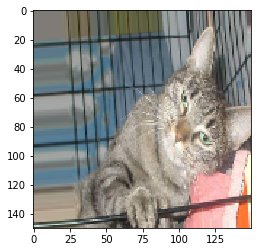

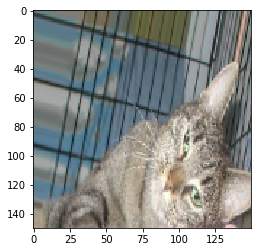

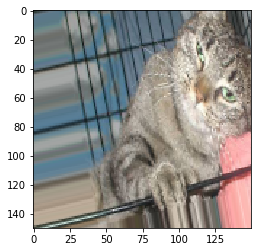

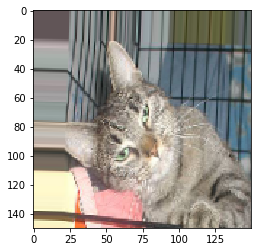

In [10]:
from keras.preprocessing import image

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[4]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()


Define a new network that includes a Dropout layer:

In [125]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [126]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [127]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6924 - acc: 0.5222 - val_loss: 0.6903 - val_acc: 0.5108
Epoch 2/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6823 - acc: 0.5656 - val_loss: 0.6703 - val_acc: 0.5685
Epoch 3/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6709 - acc: 0.5844 - val_loss: 0.6493 - val_acc: 0.6066
Epoch 4/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6475 - acc: 0.6203 - val_loss: 0.6571 - val_acc: 0.5984
Epoch 5/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6314 - acc: 0.6350 - val_loss: 0.6464 - val_acc: 0.6352
Epoch 6/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6163 - acc: 0.6625 - val_loss: 0.6015 - val_acc: 0.6586
Epoch 7/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6061 - acc: 0.6638 - val_loss: 0.5745 - val_acc: 0.6789
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 20s 203ms/step - loss: 0.4142 - acc: 0.8181 - val_loss: 0.4404 - val_acc: 0.7957
Epoch 62/100
100/100 [==============================] - 20s 204ms/step - loss: 0.4093 - acc: 0.8162 - val_loss: 0.5303 - val_acc: 0.7456
Epoch 63/100
100/100 [==============================] - 20s 201ms/step - loss: 0.4038 - acc: 0.8141 - val_loss: 0.4246 - val_acc: 0.8115
Epoch 64/100
100/100 [==============================] - 20s 203ms/step - loss: 0.4057 - acc: 0.8153 - val_loss: 0.4775 - val_acc: 0.7868
Epoch 65/100
100/100 [==============================] - 20s 204ms/step - loss: 0.4144 - acc: 0.8078 - val_loss: 0.4377 - val_acc: 0.7970
Epoch 66/100
100/100 [==============================] - 20s 201ms/step - loss: 0.3905 - acc: 0.8175 - val_loss: 0.4344 - val_acc: 0.8052
Epoch 67/100
100/100 [==============================] - 20s 201ms/step - loss: 0.4080 - acc: 0.8203 - val_loss: 0.4038 - val_acc: 0.8179
Epoch 68/100
100/100 [===================

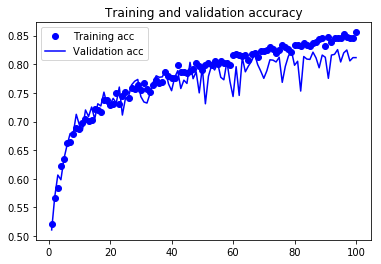

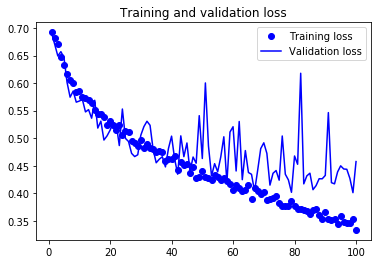

In [128]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Using a Pre-trained ConvNet for Feature Extraction

In [25]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## Feature Extraction

### Extracting Features usign the pretrained convolutional base

In [29]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
train_features (2000, 8192)
validation_features (1000, 8192)
test_features (1000, 8192)
train_labels (2000,)
validation_labels (1000,)
test_labels (1000,)


In [30]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 549us/step - loss: 0.5929 - acc: 0.6765 - val_loss: 0.4448 - val_acc: 0.8240
Epoch 2/30
2000/2000 [==============================] - 1s 345us/step - loss: 0.4349 - acc: 0.8155 - val_loss: 0.3636 - val_acc: 0.8670
Epoch 3/30
2000/2000 [==============================] - 1s 367us/step - loss: 0.3688 - acc: 0.8430 - val_loss: 0.3253 - val_acc: 0.8830
Epoch 4/30
2000/2000 [==============================] - 1s 378us/step - loss: 0.3220 - acc: 0.8705 - val_loss: 0.3045 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 1s 363us/step - loss: 0.2854 - acc: 0.8845 - val_loss: 0.2860 - val_acc: 0.8980
Epoch 6/30
2000/2000 [==============================] - 1s 362us/step - loss: 0.2736 - acc: 0.8910 - val_loss: 0.2754 - val_acc: 0.9020
Epoch 7/30
2000/2000 [==============================] - 1s 383us/step - loss: 0.2518 - acc: 0.9005 - val_loss: 0.2668 - val_acc: 0.8970


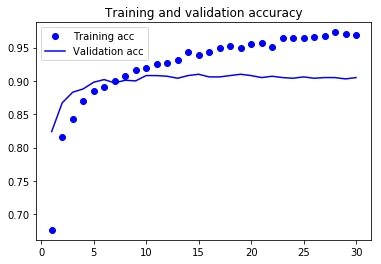

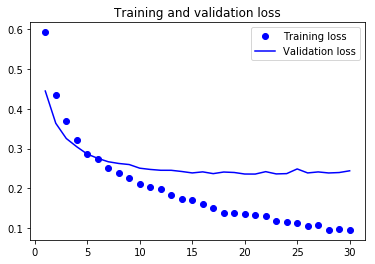

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Feature Extraction with Data Augmentation

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

print('This is the number of trainable weights before freezing:', len(model.trainable_weights))
conv_base.trainable=False
print('This is the number of trainable weights after freezing:', len(model.trainable_weights))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
This is the number of trainable weights before freezing: 30
This is the number of trainable weights after freezing: 4


In [34]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 15s 148ms/step - loss: 0.6115 - acc: 0.6750 - val_loss: 0.4567 - val_acc: 0.8400
Epoch 2/30
100/100 [==============================] - 13s 135ms/step - loss: 0.4850 - acc: 0.7895 - val_loss: 0.3809 - val_acc: 0.8440
Epoch 3/30
100/100 [==============================] - 13s 135ms/step - loss: 0.4383 - acc: 0.8070 - val_loss: 0.3527 - val_acc: 0.8580
Epoch 4/30
100/100 [==============================] - 13s 132ms/step - loss: 0.3975 - acc: 0.8335 - val_loss: 0.3097 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 13s 132ms/step - loss: 0.3831 - acc: 0.8345 - val_loss: 0.2940 - val_acc: 0.8860
Epoch 6/30
100/100 [==============================] - 13s 134ms/step - loss: 0.3678 - acc: 0.8400 - val_loss: 0.2864 - val_acc: 0.8810
Epoch 7/30
100/100 [==============================] - 14s 135ms/step - loss: 0.3518 - acc: 0.8465 - val_lo

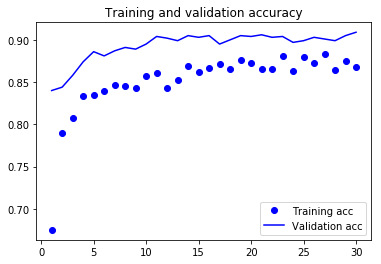

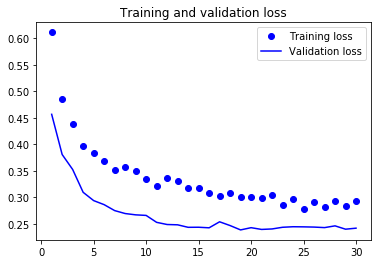

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine Tuning

In [36]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [37]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 15s 147ms/step - loss: 0.2976 - acc: 0.8665 - val_loss: 0.2333 - val_acc: 0.9050
Epoch 2/100
100/100 [==============================] - 13s 132ms/step - loss: 0.2626 - acc: 0.8845 - val_loss: 0.2275 - val_acc: 0.9120
Epoch 3/100
100/100 [==============================] - 13s 132ms/step - loss: 0.2534 - acc: 0.9010 - val_loss: 0.2469 - val_acc: 0.9060
Epoch 4/100
100/100 [==============================] - 13s 133ms/step - loss: 0.2100 - acc: 0.9130 - val_loss: 0.2077 - val_acc: 0.9200
Epoch 5/100
100/100 [==============================] - 13s 132ms/step - loss: 0.2137 - acc: 0.9030 - val_loss: 0.2253 - val_acc: 0.9150
Epoch 6/100
100/100 [==============================] - 14s 135ms/step - loss: 0.1947 - acc: 0.9210 - val_loss: 0.1934 - val_acc: 0.9300
Epoch 7/100
100/100 [==============================] - 13s 135ms/step - loss: 0.1909 - acc: 0.9225 - val_loss: 0.2364 - val_acc: 0.9130
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 14s 136ms/step - loss: 0.0253 - acc: 0.9915 - val_loss: 0.3183 - val_acc: 0.9250
Epoch 62/100
100/100 [==============================] - 13s 133ms/step - loss: 0.0349 - acc: 0.9890 - val_loss: 0.2267 - val_acc: 0.9420
Epoch 63/100
100/100 [==============================] - 13s 135ms/step - loss: 0.0311 - acc: 0.9865 - val_loss: 0.5047 - val_acc: 0.9050
Epoch 64/100
100/100 [==============================] - 13s 132ms/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.2088 - val_acc: 0.9390
Epoch 65/100
100/100 [==============================] - 13s 135ms/step - loss: 0.0309 - acc: 0.9895 - val_loss: 0.2161 - val_acc: 0.9440
Epoch 66/100
100/100 [==============================] - 13s 133ms/step - loss: 0.0246 - acc: 0.9925 - val_loss: 0.2676 - val_acc: 0.9310
Epoch 67/100
100/100 [==============================] - 13s 135ms/step - loss: 0.0362 - acc: 0.9880 - val_loss: 0.2310 - val_acc: 0.9380
Epoch 68/100
100/100 [===================

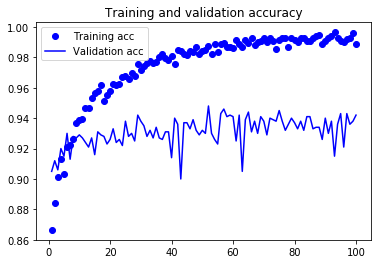

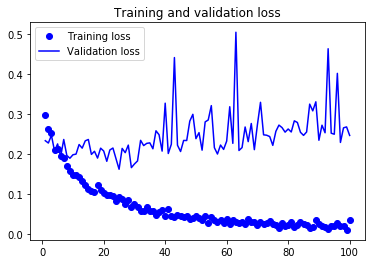

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

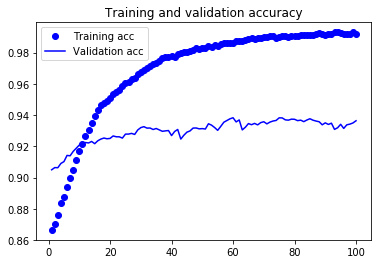

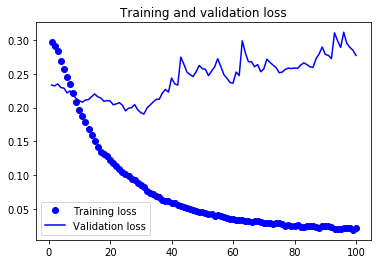

In [39]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9409999907016754


# Visualising what Convnets Learn

## Visualising Intermediate Activations

In [129]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [130]:
img_path = os.path.join(original_dataset_dir, 'cat.1700.jpg')

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

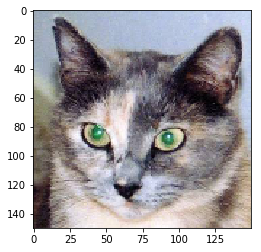

In [131]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [132]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


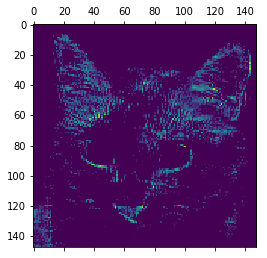

In [133]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

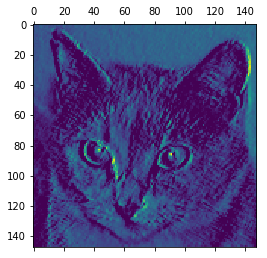

In [134]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/home/40057686/anaconda3/envs/keras-notebooks/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


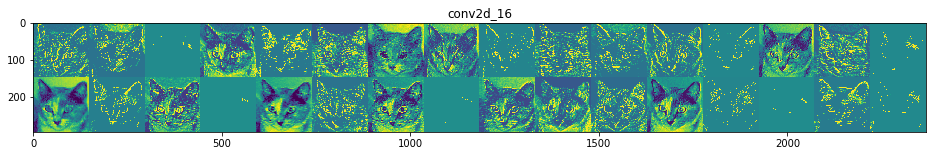

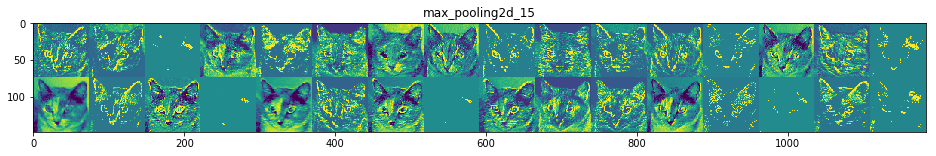

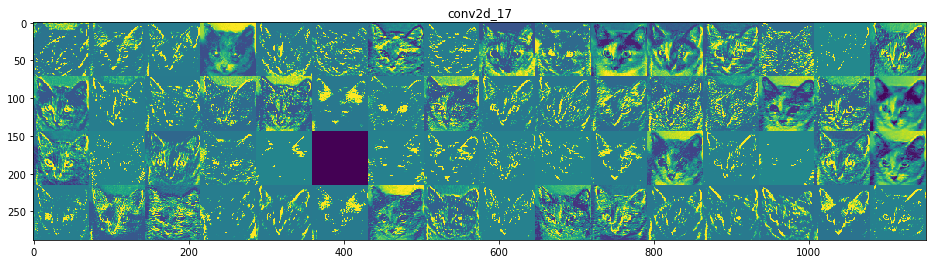

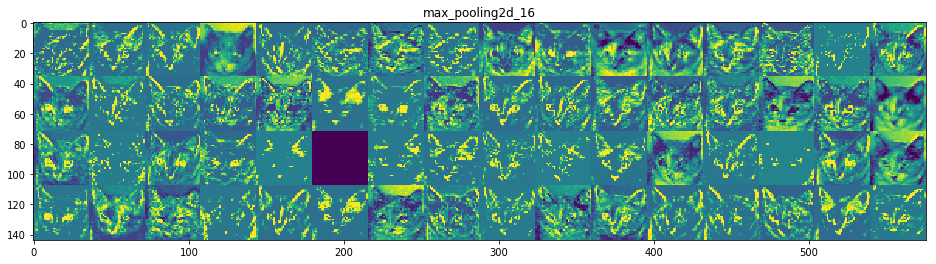

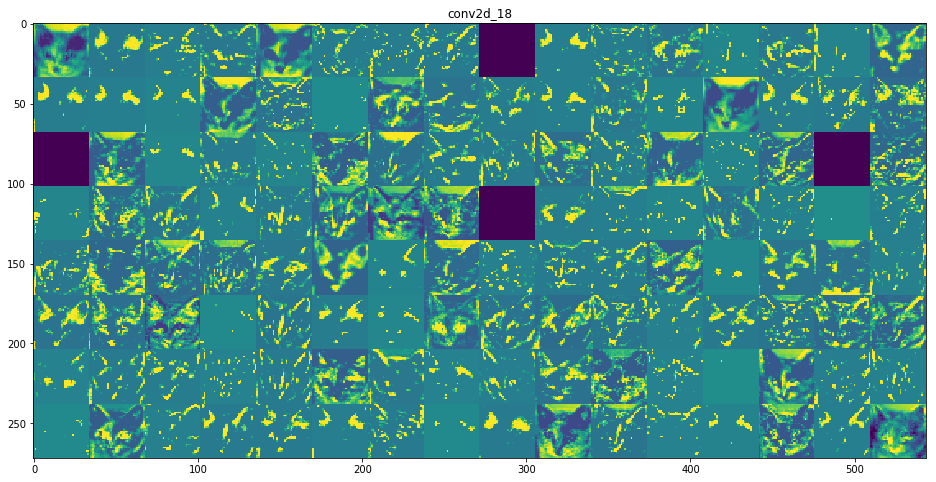

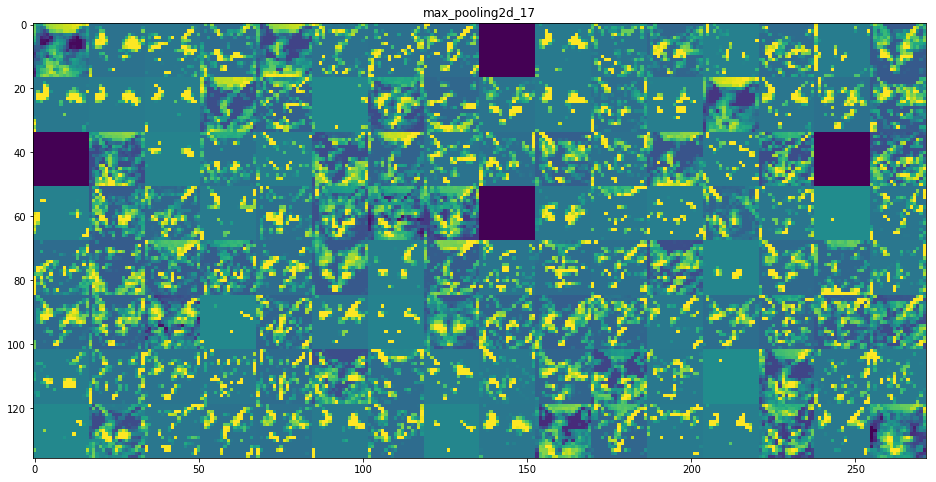

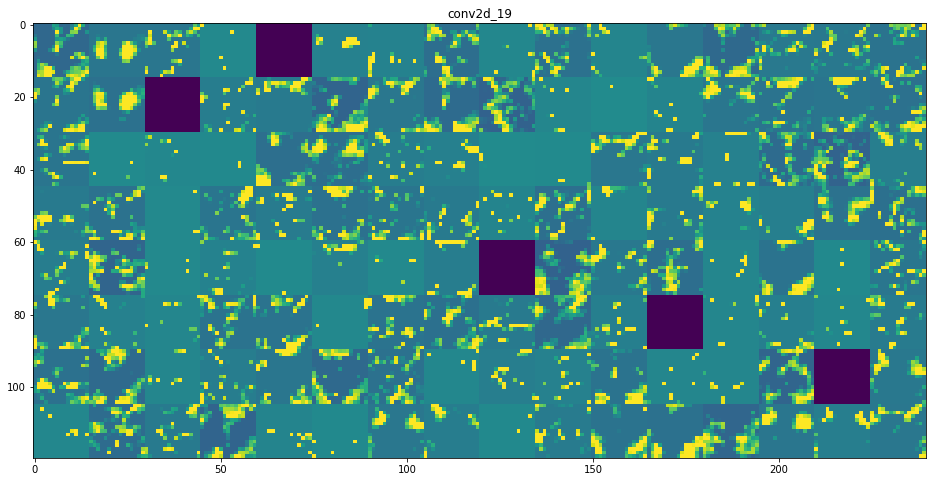

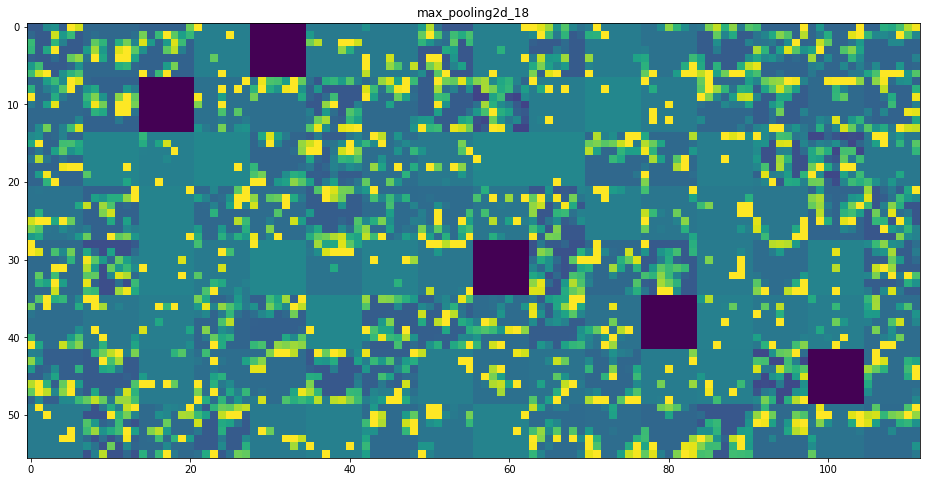

In [135]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

## Visualising ConvNet Filters

In [138]:
from keras.applications import VGG16
from keras import backend as K
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

iterate = K.function([model.input], [loss, grads])
loss_values, grads_values = iterate([np.zeros((1, 150, 150, 3))])

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128

step = 1
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step


In [139]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [143]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([model.input], [loss, grads])
    loss_values, grads_values = iterate([np.zeros((1, 150, 150, 3))])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128

    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img = input_img_data[0]
    return deprocess_image(img)

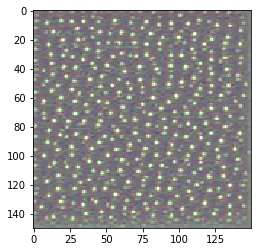

In [144]:
plt.imshow(generate_pattern('block3_conv1', 0))

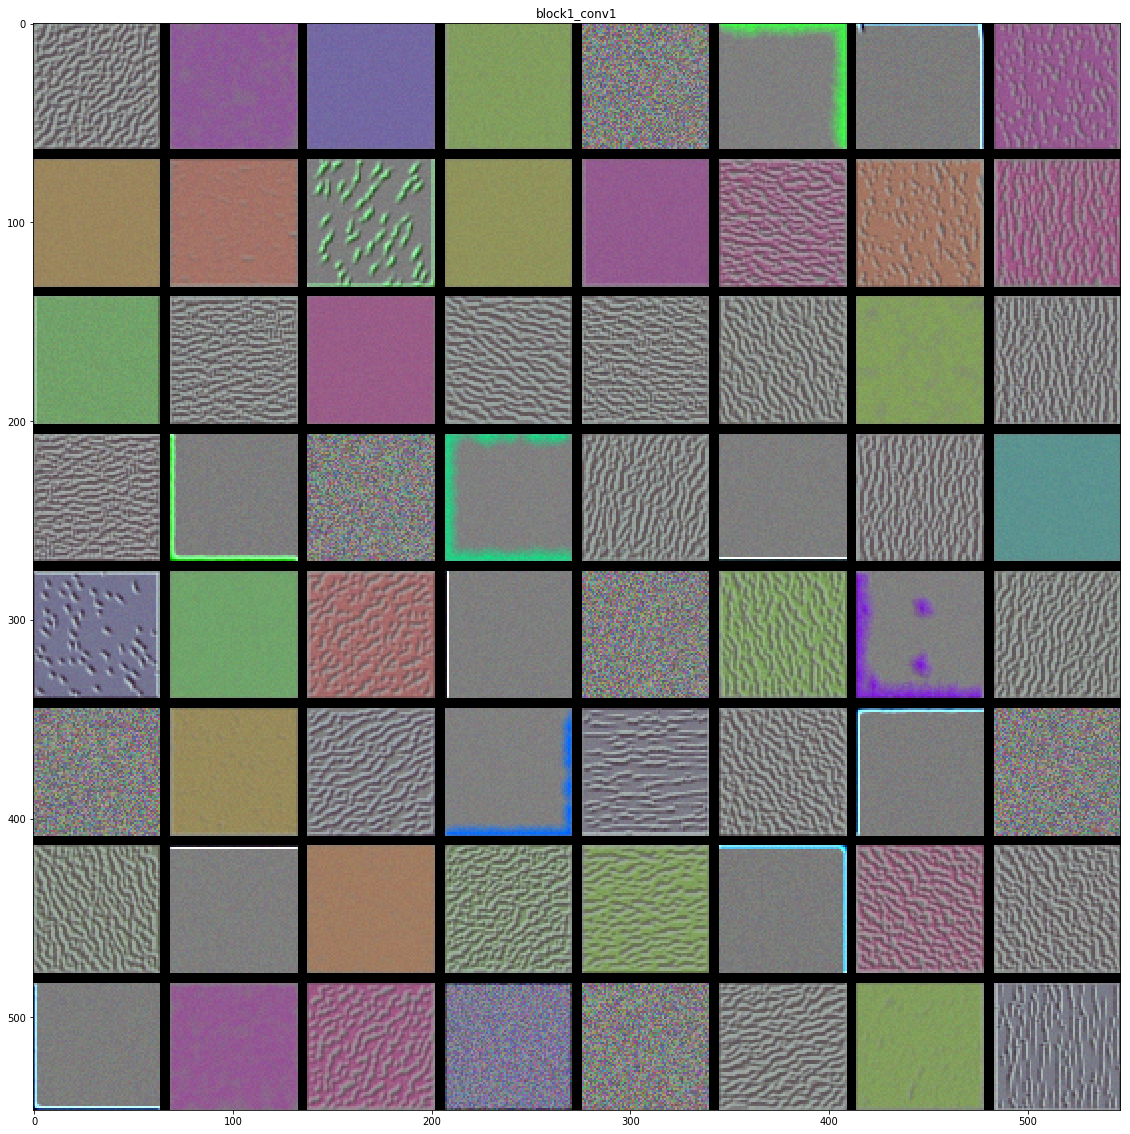

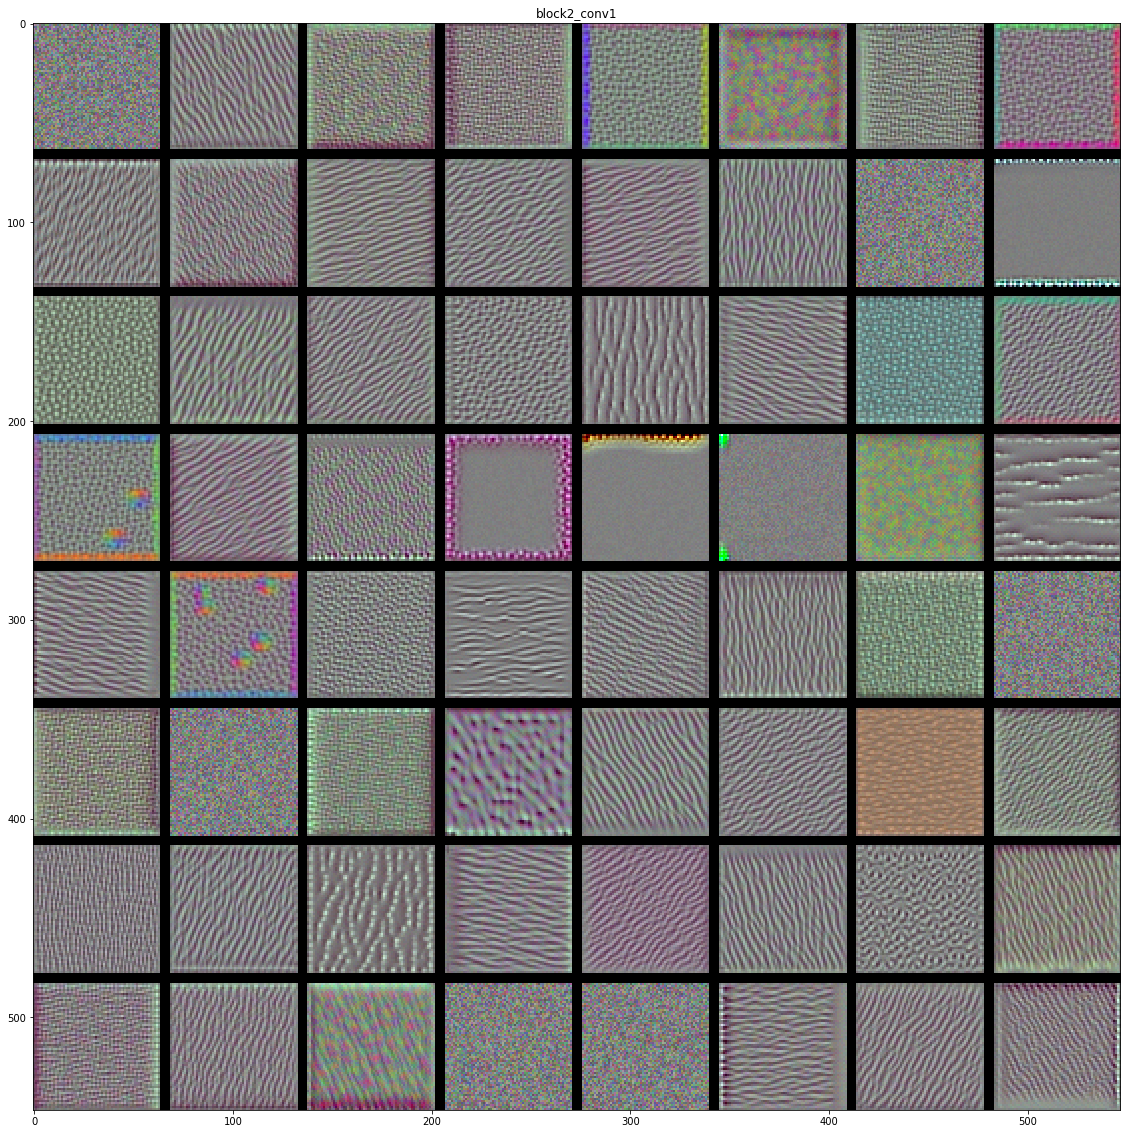

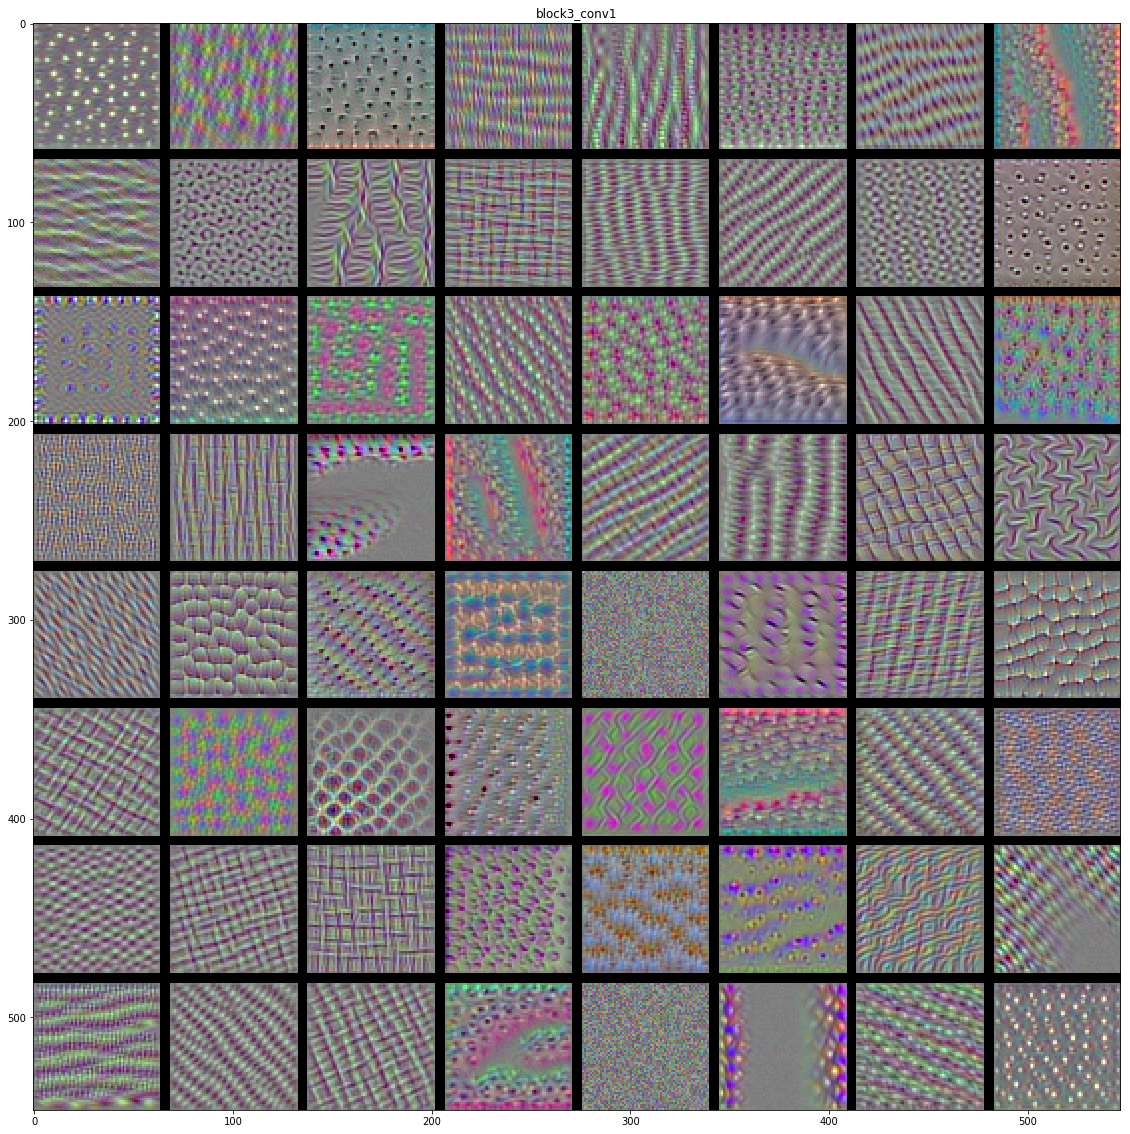

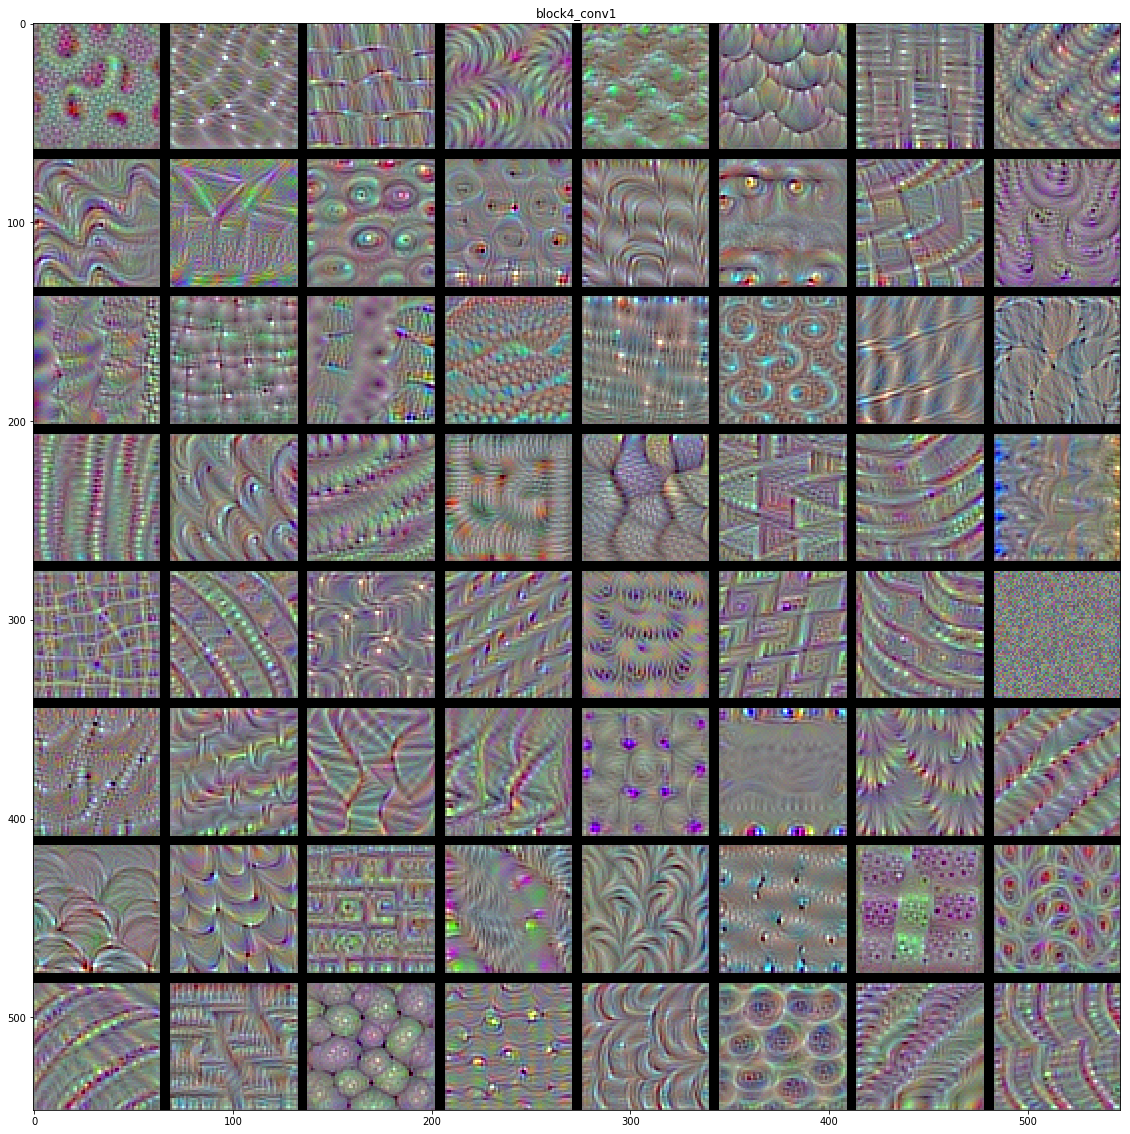

In [151]:
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']
size = 64
margin = 5

for layer_name in layer_names:
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3)).astype('uint8')

    for i in range(8):
        for j in range(8):
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start : horizontal_end, vertical_start : vertical_end, :] = filter_img
            
    plt.figure(figsize=(20, 20))
    plt.title(layer_name)
    plt.imshow(results)


## Visualising Heatmaps of Class Activation

In [152]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 26s 0us/step


In [155]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import urllib.request

img_url = 'https://1.bp.blogspot.com/-EmrJnYdDWas/UmUPmA2633I/AAAAAAAAWEU/ya95mP_qwUQ/s1600/African+Elephant+Wallpapers+(6).jpg'
img_path, _ = urllib.request.urlretrieve(img_url)

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [156]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 7us/step
Predicted: [('n02504458', 'African_elephant', 0.63049775), ('n02504013', 'Indian_elephant', 0.1857059), ('n01871265', 'tusker', 0.15790595)]


In [157]:
np.argmax(preds[0])

386

In [159]:
african_elephant_output = model.output[: 386]
last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

heatmap = np.mean(conv_layer_output_value, axis=-1)

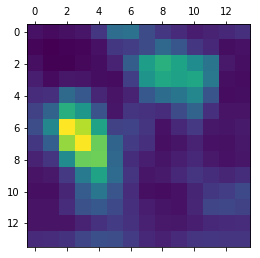

In [160]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

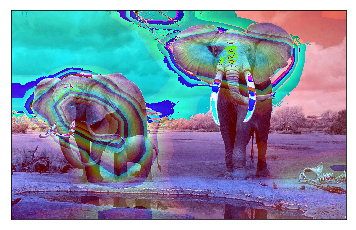

In [164]:
import cv2

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img
superimposed_img = superimposed_img.astype('uint8')

plt.imshow(superimposed_img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()